In [31]:
# http://www.statsmodels.org/stable/examples/notebooks/generated/markov_regression.html
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# NBER recessions
from pandas_datareader.data import DataReader
from datetime import datetime
usrec = DataReader('USREC', 'fred', start=datetime(1947,1,1), end=datetime(2013,4,1))

In [3]:
# Get the federal funds rate data
from statsmodels.tsa.regime_switching.tests.test_markov_regression import fedfunds
dta_fedfunds = pd.Series(fedfunds, index=pd.date_range('1954-07-01', '2010-10-01', freq='QS'))

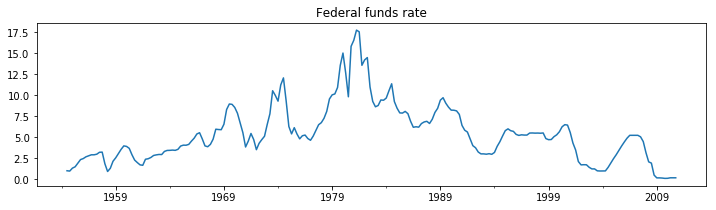

In [4]:
# Plot the data
dta_fedfunds.plot(title='Federal funds rate', figsize=(12,3))

In [5]:
# fit the model -- (a switching mean is the default of the MarkovRegession model)
mod_fedfunds = sm.tsa.MarkovRegression(dta_fedfunds, k_regimes=2)
res_fedfunds = mod_fedfunds.fit()

In [6]:
res_fedfunds.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                  226
Model:               MarkovRegression   Log Likelihood                -508.636
Date:                Sun, 22 Jul 2018   AIC                           1027.272
Time:                        15:07:58   BIC                           1044.375
Sample:                    07-01-1954   HQIC                          1034.174
                         - 10-01-2010                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7088      0.177     20.988      0.000       3.362       4.055
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5568      0.300     31.857      0.000       8.969      10.145
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.4418      0.425     10.447      0.000       3.608       5.275
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9821      0.010     94.443      0.000       0.962       1.002
p[1->0]        0.0504      0.027      1.876      0.061      -0.002       0.103
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

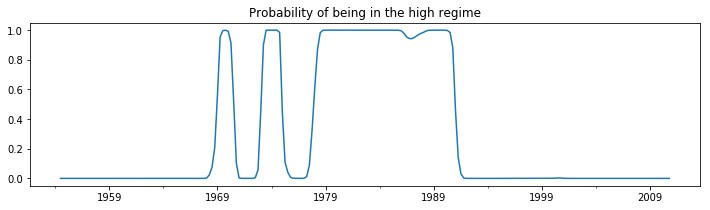

In [8]:
res_fedfunds.smoothed_marginal_probabilities[1].plot(title='Probability of being in the high regime',
                                                    figsize=(12,3));

In [9]:
print(res_fedfunds.expected_durations)

[55.85400626 19.85506546]


In [11]:
# Fit the model
mod_fedfunds2 = sm.tsa.MarkovRegression(dta_fedfunds.iloc[1:],
                                      k_regimes=2, exog=dta_fedfunds.iloc[:-1])
res_fedfunds2 = mod_fedfunds2.fit()

In [12]:
res_fedfunds2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                  225
Model:               MarkovRegression   Log Likelihood                -264.711
Date:                Sun, 22 Jul 2018   AIC                            543.421
Time:                        15:26:57   BIC                            567.334
Sample:                    10-01-1954   HQIC                           553.073
                         - 10-01-2010                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7245      0.289      2.510      0.012       0.159       1.290
x1             0.7631      0.034     22.629      0.000       0.697       0.829
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0989      0.118     -0.835      0.404      -0.331       0.133
x1             1.0612      0.019     57.351      0.000       1.025       1.097
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4783      0.050      9.642      0.000       0.381       0.576
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.6378      0.120      5.304      0.000       0.402       0.874
p[1->0]        0.1306      0.050      2.634      0.008       0.033       0.228
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

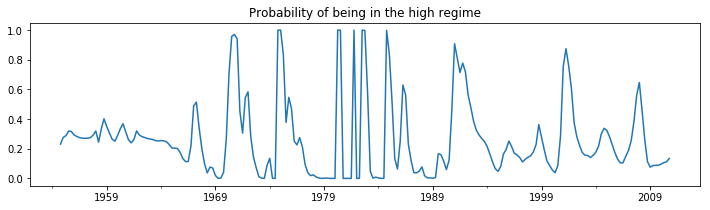

In [13]:
res_fedfunds2.smoothed_marginal_probabilities[0].plot(title='Probability of being in the high regime',
                                                     figsize=(12,3));

In [15]:
print(res_fedfunds2.expected_durations)

[2.76105188 7.65529154]


In [16]:
# Taylor rule with 2 or 3 regimes
# We now include two additional exogenous variables - a measure of the output gap and a measure of inflation - to estimate a switching Taylor-type rule with both 2 and 3 regimes to see which fits the data better.

In [18]:
# Get the additional data
from statsmodels.tsa.regime_switching.tests.test_markov_regression import ogap, inf
dta_ogap = pd.Series(ogap, index=pd.date_range('1954-07-01', '2010-10-01', freq='QS'))
dta_inf = pd.Series(inf, index=pd.date_range('1954-07-01', '2010-10-01', freq='QS'))
exog = pd.concat((dta_fedfunds.shift(), dta_ogap, dta_inf), axis=1).iloc[4:]

In [20]:
# Fit the 2-regime model
mod_fedfunds3 = sm.tsa.MarkovRegression(dta_fedfunds.iloc[4:], k_regimes=2, exog=exog)
res_fedfunds3 = mod_fedfunds3.fit()

In [21]:
# Fit the 3 regime model
np.random.seed(12345)
mod_fedfunds4 = sm.tsa.MarkovRegression(dta_fedfunds.iloc[4:], k_regimes=3, exog=exog)
res_fedfunds4 = mod_fedfunds4.fit(search_reps=20)

In [22]:
res_fedfunds3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                  222
Model:               MarkovRegression   Log Likelihood                -229.256
Date:                Sun, 22 Jul 2018   AIC                            480.512
Time:                        15:43:47   BIC                            517.942
Sample:                    07-01-1955   HQIC                           495.624
                         - 10-01-2010                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6555      0.137      4.771      0.000       0.386       0.925
x1             0.8314      0.033     24.951      0.000       0.766       0.897
x2             0.1355      0.029      4.609      0.000       0.078       0.193
x3            -0.0274      0.041     -0.671      0.502      -0.107       0.053
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0945      0.128     -0.739      0.460      -0.345       0.156
x1             0.9293      0.027     34.309      0.000       0.876       0.982
x2             0.0343      0.024      1.429      0.153      -0.013       0.081
x3             0.2125      0.030      7.147      0.000       0.154       0.271
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.3323      0.035      9.526      0.000       0.264       0.401
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7279      0.093      7.828      0.000       0.546       0.910
p[1->0]        0.2115      0.064      3.298      0.001       0.086       0.337
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [24]:
res_fedfunds4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                  222
Model:               MarkovRegression   Log Likelihood                -180.806
Date:                Sun, 22 Jul 2018   AIC                            399.611
Time:                        16:16:10   BIC                            464.262
Sample:                    07-01-1955   HQIC                           425.713
                         - 10-01-2010                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0250      0.292     -3.514      0.000      -1.597      -0.453
x1             0.3277      0.086      3.809      0.000       0.159       0.496
x2             0.2036      0.050      4.086      0.000       0.106       0.301
x3             1.1381      0.081     13.972      0.000       0.978       1.298
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0259      0.087     -0.298      0.766      -0.196       0.145
x1             0.9737      0.019     50.206      0.000       0.936       1.012
x2             0.0341      0.017      1.973      0.049       0.000       0.068
x3             0.1215      0.022      5.605      0.000       0.079       0.164
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7346      0.136      5.419      0.000       0.469       1.000
x1             0.8436      0.024     34.798      0.000       0.796       0.891
x2             0.1633      0.032      5.067      0.000       0.100       0.226
x3            -0.0499      0.027     -1.829      0.067      -0.103       0.004
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1660      0.018      9.138      0.000       0.130       0.202
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7214      0.117      6.147      0.000       0.491       0.951
p[1->0]     4.001e-08      0.035   1.13e-06      1.000      -0.069       0.069
p[2->0]        0.0783      0.057      1.372      0.170      -0.034       0.190
p[0->1]        0.1044      0.095      1.103      0.270      -0.081       0.290
p[1->1]        0.8259      0.054     15.201      0.000       0.719       0.932
p[2->1]        0.2288      0.073      3.126      0.002       0.085       0.372
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differ

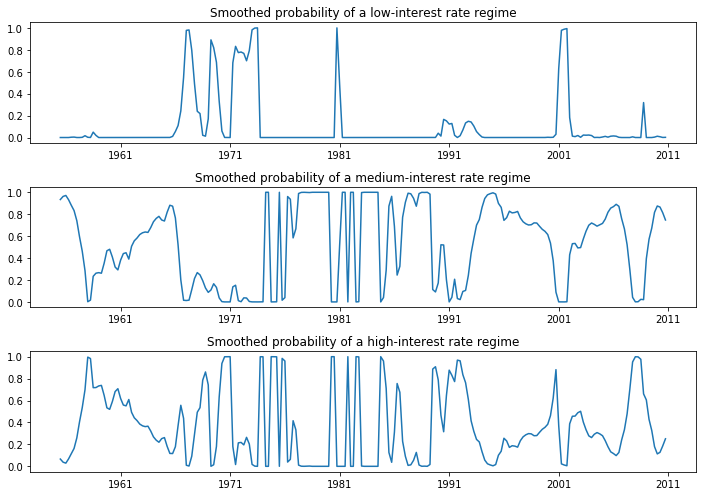

In [25]:
fig, axes = plt.subplots(3, figsize=(10,7))

ax = axes[0]
ax.plot(res_fedfunds4.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-interest rate regime')

ax = axes[1]
ax.plot(res_fedfunds4.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-interest rate regime')

ax = axes[2]
ax.plot(res_fedfunds4.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-interest rate regime')

fig.tight_layout()

In [26]:
# Switching variances
# Get the federal funds rate data
from statsmodels.tsa.regime_switching.tests.test_markov_regression import areturns
dta_areturns = pd.Series(areturns, index=pd.date_range('2004-05-04', '2014-05-03', freq='W'))

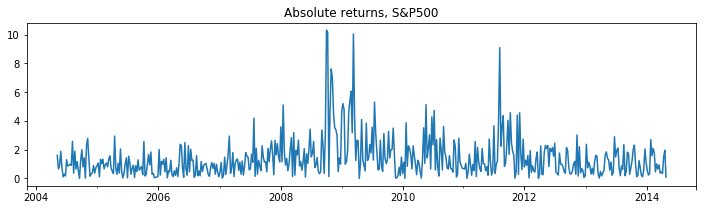

In [27]:
# Plot the data
dta_areturns.plot(title='Absolute returns, S&P500', figsize=(12,3))

In [28]:
# Fit the model
mod_areturns = sm.tsa.MarkovRegression(dta_areturns.iloc[1:],
                                       k_regimes=2, exog=dta_areturns.iloc[:-1], switching_variance=True)
res_areturns = mod_areturns.fit()

In [29]:
res_areturns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                  520
Model:               MarkovRegression   Log Likelihood                -745.798
Date:                Sun, 22 Jul 2018   AIC                           1507.595
Time:                        16:25:42   BIC                           1541.626
Sample:                    05-16-2004   HQIC                          1520.926
                         - 04-27-2014                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7641      0.078      9.761      0.000       0.611       0.918
x1             0.0791      0.030      2.620      0.009       0.020       0.138
sigma2         0.3476      0.061      5.694      0.000       0.228       0.467
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9728      0.278      7.086      0.000       1.427       2.518
x1             0.5280      0.086      6.155      0.000       0.360       0.696
sigma2         2.5771      0.405      6.357      0.000       1.783       3.372
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7531      0.063     11.871      0.000       0.629       0.877
p[1->0]        0.6825      0.066     10.301      0.000       0.553       0.812
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

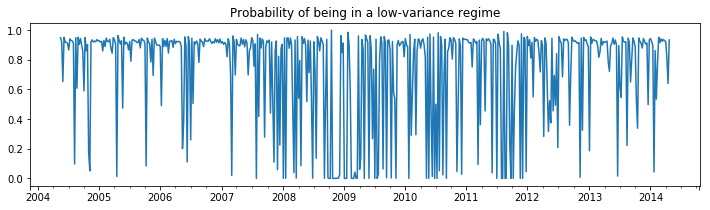

In [30]:
res_areturns.smoothed_marginal_probabilities[0].plot(title='Probability of being in a low-variance regime', figsize=(12,3));